# Exercise 2

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from scipy.stats import genpareto
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import csv

np.random.seed(1234)

In [3]:
def make_data(n, p, mean=0, cov=1):
    mean_vector = np.full((p,), mean)
    
    cov_diag = np.full((p,), cov)
    cov_matrix = np.diagflat(cov_diag)
   
    observations_x = ((np.random.weibull(p, n*p))).reshape(n, p)
    
    observations_y = np.random.randn(n)
    
    
    return observations_x, observations_y

In [4]:
def linear_regression(train_X, train_Y, test_X, test_Y):
    regression_model = Lasso(alpha = 0.000001, max_iter = 10000)
    regression_model.fit(train_X, train_Y)

    train_results = regression_model.predict(train_X)
    test_results = regression_model.predict(test_X)

    train_error = mean_squared_error(train_Y, train_results)
    test_error = mean_squared_error(test_Y, test_results)
    parameters_norm = np.linalg.norm(regression_model.coef_)
    
    return train_error, test_error, parameters_norm

In [5]:
def test_regression(train_X, train_Y, test_X, test_Y, p):
    train_X = train_X[:,:p]
    test_X = test_X[:,:p]
    
    train_error, test_error, parameters_norm = linear_regression(train_X, train_Y, test_X, test_Y)
    
    return train_error, test_error, parameters_norm

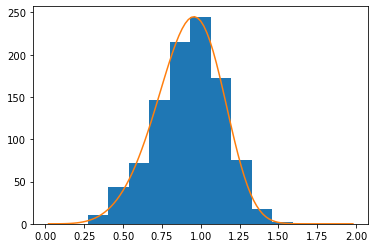

In [6]:
x = np.arange(1,100.)/50.
def weib(x,n,a):
    return (a / n) * (x / n)**(a - 1) * np.exp(-(x / n)**a)


count, bins, ignored = plt.hist(np.random.weibull(5.,1000))
x = np.arange(1,100.)/50.
scale = count.max()/weib(x, 1., 5.).max()
plt.plot(x, weib(x, 1., 5.)*scale)
plt.show()

In [7]:
n_train = 200
n_test = 100
max_features = 1000

train_X, train_Y = make_data(n_train, max_features, mean=0, cov=1)
test_X, test_Y = make_data(n_test, max_features, mean=0, cov=1)

ps = []
train_errors = []
test_errors = []
parameters_norms = []
with open('linear_regression_results.csv', 'w', newline='') as fout:
    writer = csv.DictWriter(fout, fieldnames=['# parameters', 'train loss', 'test loss', 'parameters norm'])
    writer.writeheader()
    for p in range(1, max_features, 50):
        train_error, test_error, parameters_norm = test_regression(train_X, train_Y, test_X, test_Y, p)
        ps.append(p)
        train_errors.append(train_error)
        test_errors.append(test_error)
        parameters_norms.append(parameters_norm)

        print('p: {} | train loss: {:.5f}; test loss: {:.5f}; norm: {:.5f}'.format(p, train_error, test_error, parameters_norm))

        writer.writerow({
            '# parameters': p,
            'train loss': train_error,
            'test loss': test_error,
            'parameters norm': parameters_norm
        })

p: 1 | train loss: 0.93256; test loss: 0.83678; norm: 79.00379
p: 51 | train loss: 0.73935; test loss: 1.16654; norm: 400.98603
p: 101 | train loss: 0.51581; test loss: 1.58787; norm: 719.54288
p: 151 | train loss: 0.25429; test loss: 3.76257; norm: 1192.30277
p: 201 | train loss: 0.03348; test loss: 12.07594; norm: 2473.10849
p: 251 | train loss: 0.00171; test loss: 4.96570; norm: 1566.34272
p: 301 | train loss: 0.00048; test loss: 3.24151; norm: 1113.55761
p: 351 | train loss: 0.00033; test loss: 2.43753; norm: 996.22727
p: 401 | train loss: 0.00029; test loss: 2.32512; norm: 909.02126
p: 451 | train loss: 0.00023; test loss: 1.87165; norm: 836.80408
p: 501 | train loss: 0.00018; test loss: 1.57904; norm: 819.45849
p: 551 | train loss: 0.00016; test loss: 1.62950; norm: 753.82697
p: 601 | train loss: 0.00013; test loss: 1.50848; norm: 733.30410
p: 651 | train loss: 0.00012; test loss: 1.39818; norm: 674.64455
p: 701 | train loss: 0.00011; test loss: 1.44418; norm: 666.18107
p: 751 | 

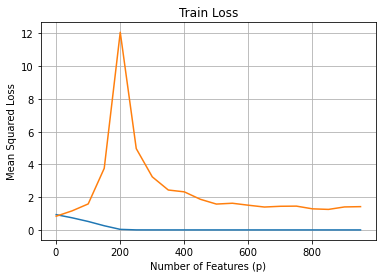

In [8]:
fig, ax = plt.subplots()
ax.plot(ps, train_errors)
plt.plot(ps, test_errors)

ax.set(xlabel='Number of Features (p)', ylabel='Mean Squared Loss',
       title='Train Loss')
ax.grid()

(0.0, 30.0)

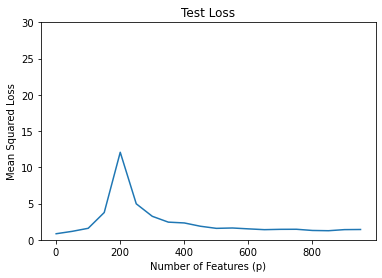

In [9]:
plt.xlabel('Number of Features (p)')
plt.ylabel('Mean Squared Loss')
plt.title('Test Loss')
plt.plot(ps, test_errors)
plt.ylim(0, 30)

(0.0, 3000.0)

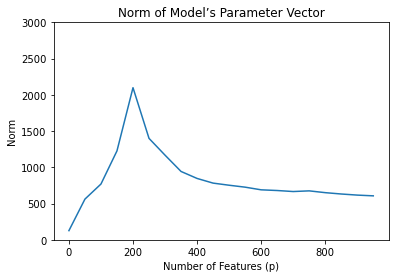

In [35]:
plt.xlabel('Number of Features (p)')
plt.ylabel('Norm')
plt.title('Norm of Model’s Parameter Vector')
plt.plot(ps, parameters_norms)
plt.ylim(0, 3000)